# Data Preprocessing
Data preparation involves data visualization, data cleaning and data exploration. Data cleaning involves the following;
- Handling Data imbalance
- Feature selection
- Feature scaling
- Handling categorical variables
- Handling missing data

For the selection of the ML algorithm to use, data visualization and data correlation are heavily used to decide this choice. When a two features are strongly correlated, only one should be used else it will act as noise in the system and increase model complexity thereby leading to overfitting. Removing these features is also necessary due to speed because having unneccesary information adds more calculation and parameters to the model.

When a feature is weakly correlated to the outcome, it can be removed from the feature set.Data visualization helps find how many of the individual features correlate with the output.

Random forests/decision trees can be used to find data correlation. One popular rank correlation method in ML is the Principal Component Analysis. It’s a technique to find patterns in high dimensional data. Basically, it will simplify data of higher dimensions into lower dimensions.

# Handling missing data
One of the most common interpolation techniques is mean imputation, where we simply replace the missing value by the mean value of the entire feature column.



Pregnancies                 1.000000
Age                         0.544341
Outcome                     0.221898
BloodPressure               0.141282
Glucose                     0.129459
BMI                         0.017683
DiabetesPedigreeFunction   -0.033523
Insulin                    -0.073535
SkinThickness              -0.081672
Name: Pregnancies, dtype: float64

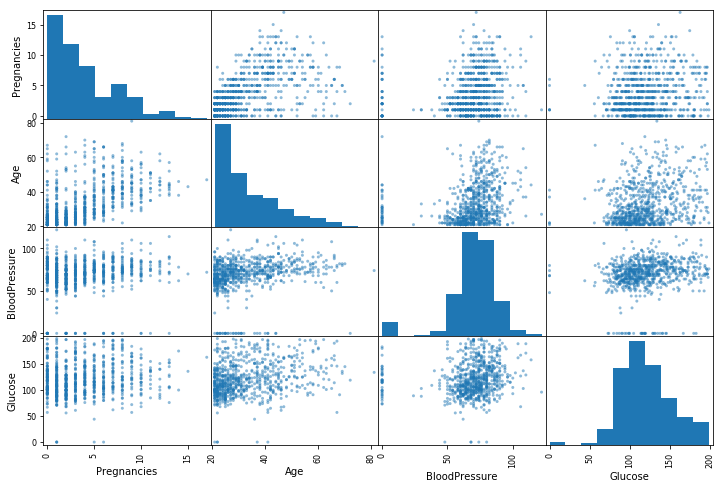

In [8]:
import pandas as pd
from pandas.plotting import scatter_matrix
df = pd.read_csv('diabetes.csv') 
#print(df.var())

attr = ['Pregnancies','Age','BloodPressure','Glucose']
scatter_matrix(df[attr], figsize=(12, 8))

corr_matrix = df.corr()
corr_matrix['Pregnancies'].sort_values(ascending=False)


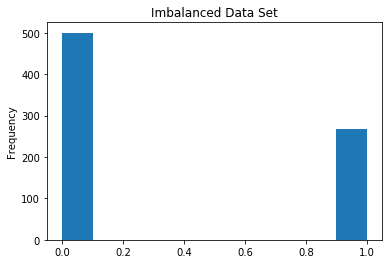

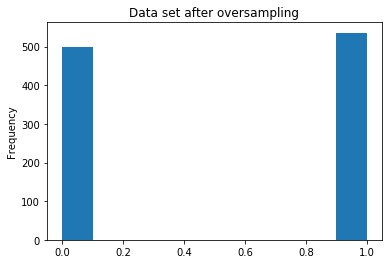

logistic regressor accuracy:  0.8102893890675241
forest accuracy:  0.8585209003215434
KNN classifier accuracy:  0.8070739549839229
SVM accuracy:  0.8585209003215434


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

def dup_label(df,label,val,n):
    temp = df[df[label] == val]
    for _ in range(n):
        df = df.append(temp,ignore_index=True)
    return df
    
df = pd.read_csv('diabetes.csv')

#Handling of missing values
from sklearn.preprocessing import Imputer
df[['Glucose','SkinThickness','BloodPressure','Insulin','BMI']]=df[['Glucose','SkinThickness','BloodPressure','Insulin','BMI']].replace(0,np.nan)
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
df_transformed = imr.fit_transform(df)
df = pd.DataFrame(df_transformed, columns = df.columns.values)

# Plot showing imbalanced data
df['Outcome'].plot(kind='hist')
plt.title('Imbalanced Data Set')
plt.show()

# Using oversampling to solve the data imbalance
df = dup_label(df,'Outcome',1,1) 
df['Outcome'].plot(kind='hist')
plt.title('Data set after oversampling')
plt.show()

feature_columns = df.columns[0:8].values
X = df[feature_columns]
y = df.Outcome

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)
#X = std_scaler.fit_transform(X)

from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression() #The L1 regularization does a form of feature selection of the dataset
estimator.fit(X_train_std,y_train)
print('logistic regressor accuracy: ',estimator.score(X_test_std,y_test))
#print('logistic regressor accuracy: ',cross_val_score(estimator,X,y,cv=10,scoring='accuracy').mean())

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=120,random_state=0,n_jobs=-1)
forest.fit(X_train,y_train)
print('forest accuracy: ',forest.score(X_test,y_test))
#print('Forest accuracy: ',cross_val_score(forest,X,y,cv=10,scoring='accuracy').mean())

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_std,y_train)
print('KNN classifier accuracy: ',knn.score(X_test_std,y_test))
#print('KNN accuracy: ',cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean())

from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0,gamma=2.0,random_state=0)
svm.fit(X_train_std,y_train)
print('SVM accuracy: ',svm.score(X_test_std,y_test))
#print('SVM accuracy: ',cross_val_score(svm,X,y,cv=10,scoring='accuracy').mean())



In [ ]:
#df_test = df.head(20)
#np.where(df_test['Insulin'] == 0,1,df_test['Insulin'])  #return 1 where true else retain the value
#df_test['Insulin'] = df_test['Insulin'].replace(0,np.nan) #replaces the value of 0 with np.nan
#df_test.columns.values
#df_test.dropna(subset = ['Insulin']) #drops the rows with the NaN data
#df_test.drop(labels=['Glucose','Insulin'],axis=1) #Drops the glucose and insulin column